# Decision Tree

### Data preprocessing

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
head(dataset, 10)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0
35,65000,0


In [3]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.80)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [5]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
1,19,19000,0
3,26,43000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
10,35,65000,0
11,26,80000,0
13,20,86000,0
14,32,18000,0
15,18,82000,0


In [6]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
2,35,20000,0
4,27,57000,0
5,19,76000,0
9,25,33000,0
12,26,52000,0
18,45,26000,1
19,46,28000,1
20,48,29000,1
22,47,49000,1
29,29,43000,0


In [7]:
# Feature Scaling*
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [8]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
1,-1.7736400,-1.4732072,0
3,-1.0986564,-0.7874962,0
6,-1.0022301,-0.3589268,0
7,-1.0022301,0.3839267,0
8,-0.5200990,2.2696320,1
10,-0.2308203,-0.1589278,0
11,-1.0986564,0.2696416,0
13,-1.6772137,0.4410693,0
14,-0.5200990,-1.5017785,0
15,-1.8700662,0.3267841,0


In [9]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
2,-0.3386781,-1.5387846,0
4,-1.0709549,-0.3133871,0
5,-1.8032318,0.3158710,0
9,-1.2540242,-1.1082396,0
12,-1.1624895,-0.4789814,0
18,0.5766680,-1.3400715,1
19,0.6682027,-1.2738338,1
20,0.8512719,-1.2407150,1
22,0.7597373,-0.5783379,1
29,-0.8878857,-0.7770511,0


### Fitting Decision Tree classifier to the Training set

In [10]:
library(rpart)
classifier = rpart(formula = Purchased ~ .,
                        data = training_set)

### Predicting the Test set results

In [11]:
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')

In [12]:
head(y_pred, 10)

2  4  5  9 12 18 19 20 22 29 
 0  0  0  0  0  0  0  1  0  0 
Levels: 0 1

In [13]:
head(test_set[3], 10)

,Purchased
2,0
4,0
5,0
9,0
12,0
18,1
19,1
20,1
22,1
29,0


### Making the Confusion Matrix

In [14]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 43  8
  1  6 23

* * *

**classifier made 43 + 23 = 66 correct prediction and 6 + 8 = 14 incoreect predictions.**

* * *

### Visualising the Training set results

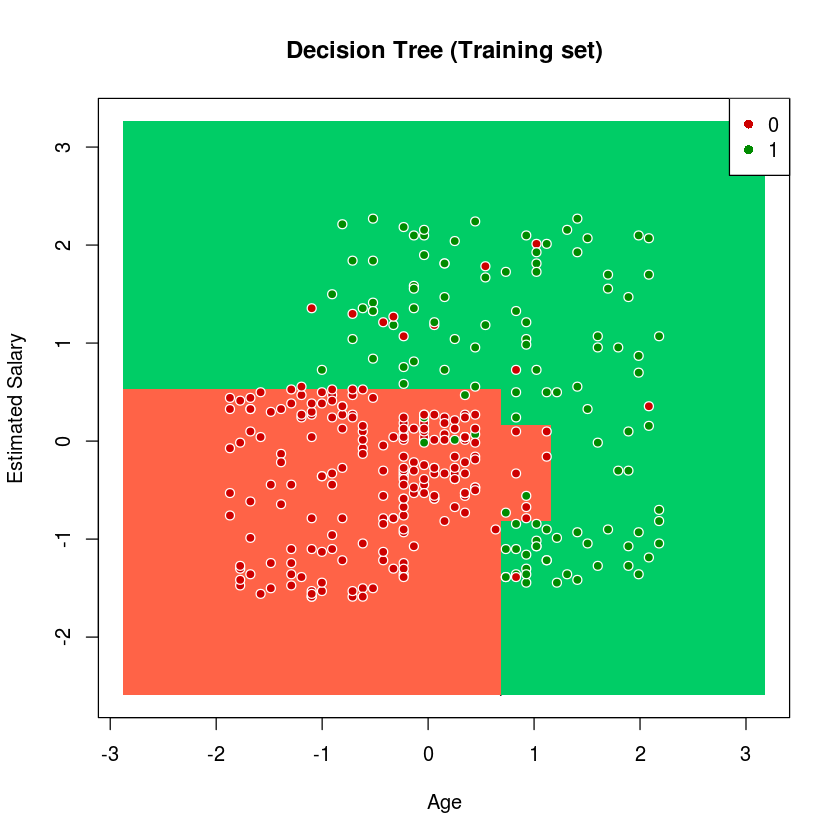

In [15]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

### Visualising the Test set results

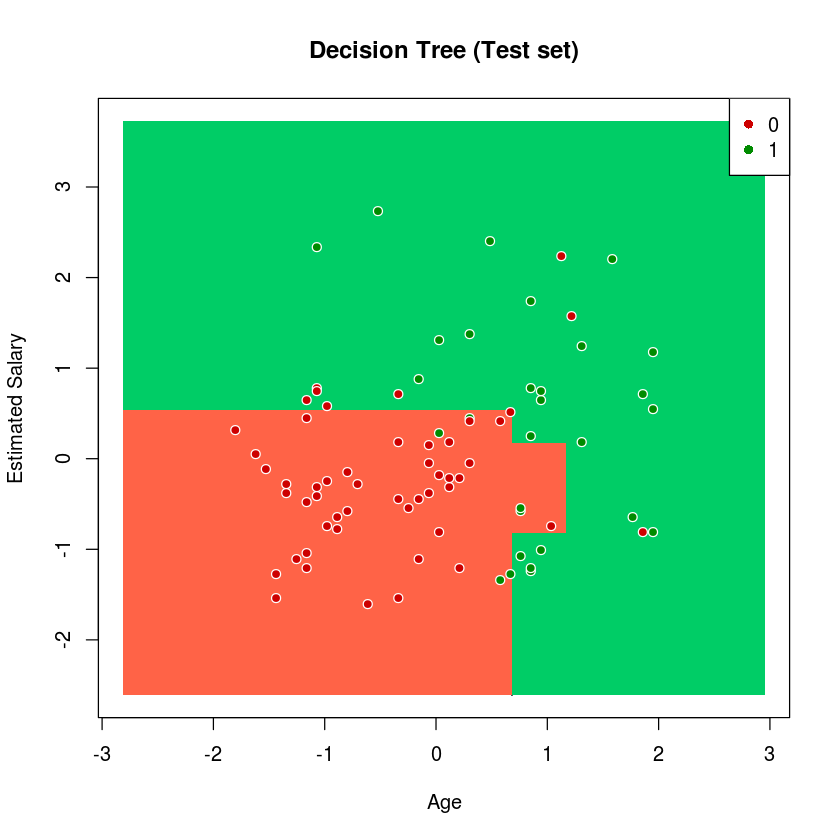

In [16]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3], main = 'Decision Tree (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

***

**Things to remmember while making decison tree classifier:**

* *Normally it overfits the data. But here in R due to 'rpart' library (a very powerful and famous library), the overfitting is drastically reduced as compare to Decision Tree Model in python.*
* *There is no need to Scale the features as decision tree does not depends on Euclidean distance. We are using Feature Scaling here just to get a plot with better resolution. If you ammit scaling, then for example the above case the vector size will be about 200+ GB which is not possible to plot.*

* * *

***

**If we dont apply feature scaling (i.e. do not run cell 7 all through cell 9), then we can have a look at the
decision tree. For this we just need to run 2 lines of code**

***

### Constructing decision tree

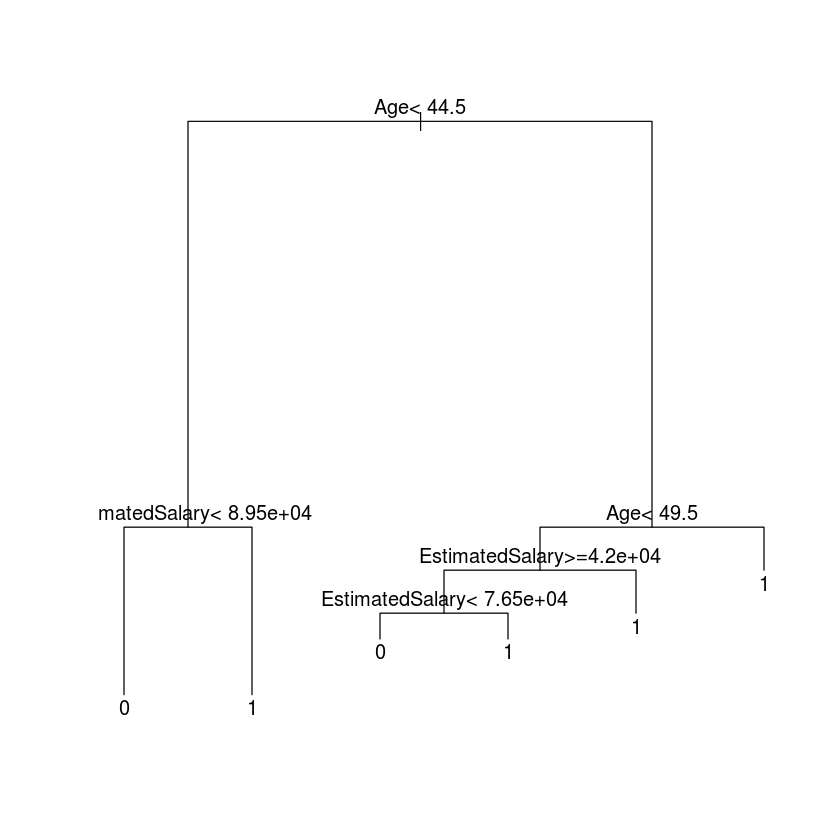

In [38]:
plot(classifier)
text(classifier)